In [5]:
import scipy.stats as sts
import numpy as np

In [6]:
def distribution(rho: float, population_size: int):
    return sts.norm(rho, ((1 + rho**2) / population_size) ** 0.5)


def generate_population(rho: float, population_size: int, number_samples: int):
    p_value_estimator = (
        lambda statistic: distribution(0, population_size).sf(statistic) * 2
    )
    dist = sts.multivariate_normal([0, 0], [[1, rho], [rho, 1]])
    for _ in range(number_samples):
        samples = dist.rvs(size=population_size)
        yield p_value_estimator(abs((samples[:, 0] @ samples[:, 1]) / population_size))

In [64]:
n_rejection = int


def without_group_correction(p_values_spread: list[float], alpha: float) -> n_rejection:
    return sum(p < alpha for p in p_values_spread)


def bonferroni(p_values_spread: list[float], alpha: float) -> n_rejection:
    return sum(p < alpha / len(p_values_spread) for p in p_values_spread)


def benjamini_hochberg(p_values_spread: list[float], alpha: float) -> n_rejection:
    sorted_inds = np.argsort(p_values_spread)
    comparison_vec = p_values_spread[sorted_inds] <= np.ones(
        len(p_values_spread)
    ) * alpha / len(p_values_spread)
    reject_cut_off_index = (
        np.argmax(np.nonzero(comparison_vec)[0]) + 1 if comparison_vec.sum() > 0 else 0
    )

    return reject_cut_off_index

A/A

In [9]:
n_trials = 100

In [42]:
sum(
    without_group_correction(
        generate_population(rho=0, population_size=100, number_samples=500), 0.05
    )
    > 0
    for _ in range(n_trials)
)

np.int64(100)

In [28]:
sum(
    bonferroni(
        list(generate_population(rho=0, population_size=100, number_samples=500)), 0.05
    )
    > 0
    for _ in range(n_trials)
)

np.int64(7)

In [41]:
sum(
    benjamini_hochberg(
        np.array(
            list(generate_population(rho=0, population_size=100, number_samples=500))
        ),
        0.05,
    )
    > 0
    for _ in range(n_trials)
)

np.int64(7)

In absence of correction group hypothesis are falsely ratified, which corresponds to invalid selection of significance level. Bonferroni and Benjamini Hochberg shows valid results, FWER is comparable to suggested $5\%$

A/B

In [52]:
n_trials = 500

In [55]:
sum(
    bonferroni(
        list(generate_population(rho=0.2, population_size=100, number_samples=50)), 0.05
    )
    > 0
    for _ in range(n_trials)
)

np.int64(498)

In [66]:
sum(
    benjamini_hochberg(
        np.array(
            list(generate_population(rho=0.2, population_size=100, number_samples=50))
        ),
        0.05,
    )
    > 0
    for _ in range(n_trials)
)

np.int64(498)

Power of finding at least one rejected hyptothesis with $\rho=0.2$ are comparable and close to $100\%$.
For clarification let's build histogram with number of rejected hypothesis

In [56]:
import matplotlib.pyplot as plt

(array([44., 56., 94., 84., 88., 59., 40., 15., 13.,  7.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

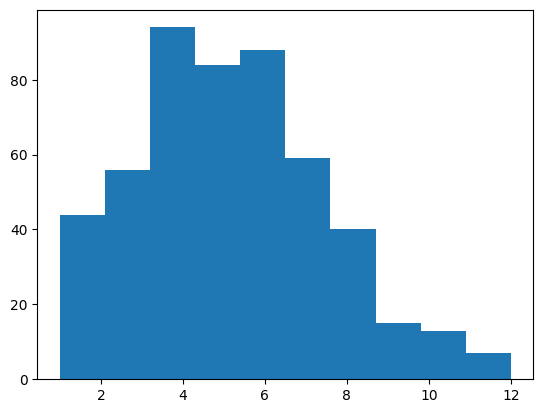

In [58]:
plt.hist(
    [
        bonferroni(
            list(generate_population(rho=0.2, population_size=100, number_samples=50)),
            0.05,
        )
        for _ in range(n_trials)
    ]
)

(array([  9.,  32., 156.,  95., 144.,  22.,  28.,   6.,   6.,   2.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

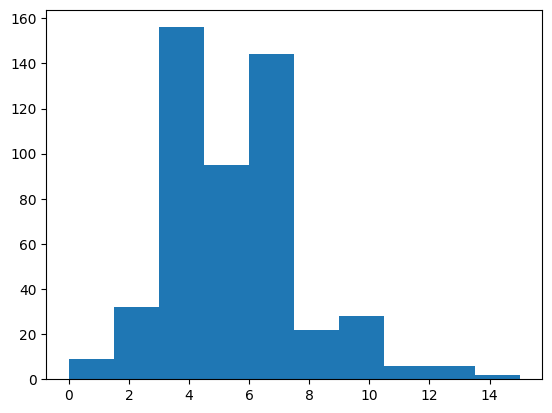

In [67]:
plt.hist(
    [
        benjamini_hochberg(
            np.array(list(generate_population(rho=0.2, population_size=100, number_samples=50))),
            0.05,
        )
        for _ in range(n_trials)
    ]
)

Benjamini Hochberg is more sensitive method.